# DECISION TREES

**File:** DecisionTrees.ipynb

# IMPORT LIBRARIES

In [1]:
import matplotlib.pyplot as plt                              # For plotting data
import seaborn as sns                                        # For plotting data
import pandas as pd                                          # For dataframes
from sklearn.model_selection import GridSearchCV             # For parameter optimization
from sklearn.tree import DecisionTreeClassifier, plot_tree   # For decision trees
from sklearn.metrics import plot_confusion_matrix            # Evaluation measure

# LOAD AND PREPARE DATA
Load the training data `trn` and testing data `tst` from the CSV files in the data directory. Separate the data matrix from the class variable.

In [2]:
# Imports the training data
trn = pd.read_csv('data/spambase_trn.csv')

# Separates the attributes X0-X56 into X_trn
X_trn = trn.filter(regex='\d')

# Separates the class variable into y_trn
y_trn = trn.y

# Imports the testing data
tst = pd.read_csv('data/spambase_tst.csv')

# Separates the attributes X0-X56 into X_tst
X_tst = tst.filter(regex='\d')

# Separates the class variable into y_tst
y_tst = tst.y

# Class labels
spam = ['Not Spam','Spam']

Look at the first few rows of the training data.

In [3]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
4,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


# DECISION TREE: TRAIN MODEL

## Fit the Training Data
A simple method to learn a decision tree is to create a `DecisionTreeClassifier` object and fit it to the training data. The object has a method `score()` that returns the accuracy of the model on the given data. The `DecisionTreeClassifier` requires two parameters:

- `criterion`: Can be `entropy` or `gini`
- `max_leaf_nodes`: Specifies the size of the tree by explicitly stating the total leaf nodes

In [4]:
# Creates a DecisionTreeClassifier object
dt = DecisionTreeClassifier(
    criterion='entropy',
    random_state=0,
    max_leaf_nodes=7) 

# Fits the decision tree to training data
dt.fit(X_trn,y_trn)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=7, random_state=0)

## Calculate Mean Accuracy on Training Data

In [5]:
print(
    'Accuracy on training data: ' 
    + str("{:.2%}".format(dt.score(X_trn, y_trn))))

Accuracy on training data: 89.84%


## Optimize the Decision Tree
The `GridSearchCV` object can be used to find the optimal decision tree. This object can be set up by specifying a range of values for `max_leaf_nodes` and the two possible values of `criterion`. In the code below `GridSearchCV` is set up with the default 5 fold cross validation.

In [6]:
# Defines a DecisionTreeClassifier object
dt = DecisionTreeClassifier(
    random_state=1) 

# Possible values for max_leaf_nodes to try
param = range(6,45,2)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(
    dt,
    {'max_leaf_nodes': param, 
     'criterion': ['entropy','gini']})

# Fits the grid to the training data 
grid.fit(X_trn,y_trn)

# Stores the optimum model in best_dt
best_dt = grid.best_estimator_

# Displays the optimum model
best_dt.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 38,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

## Plot Accuracy Against Various Parameters
The code below creates a plot of accuracy against various values of `max_leaf_nodes`. The `gini` and `entropy` measures are plotted separately.

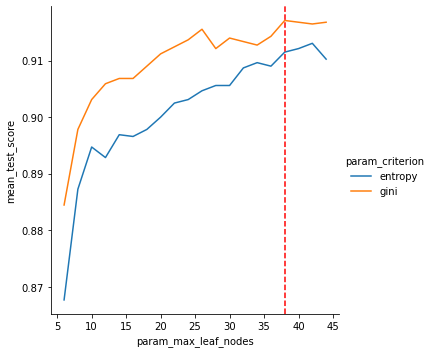

In [7]:
# Plots the mean accuracy against max_leaf_nodes
sns.relplot(
    data=pd.DataFrame.from_dict(grid.cv_results_, orient='columns'),
    kind='line',
    x='param_max_leaf_nodes', 
    y='mean_test_score', 
    hue='param_criterion'
)

# Draws a vertical red line, where the best model is
plt.axvline(
    x=best_dt.max_leaf_nodes, 
    color='red', 
    ls='--')

## Display the Decision Tree
Use `plot_tree()` to display the decision tree. The two class labels have two different shades to distinguish between them.

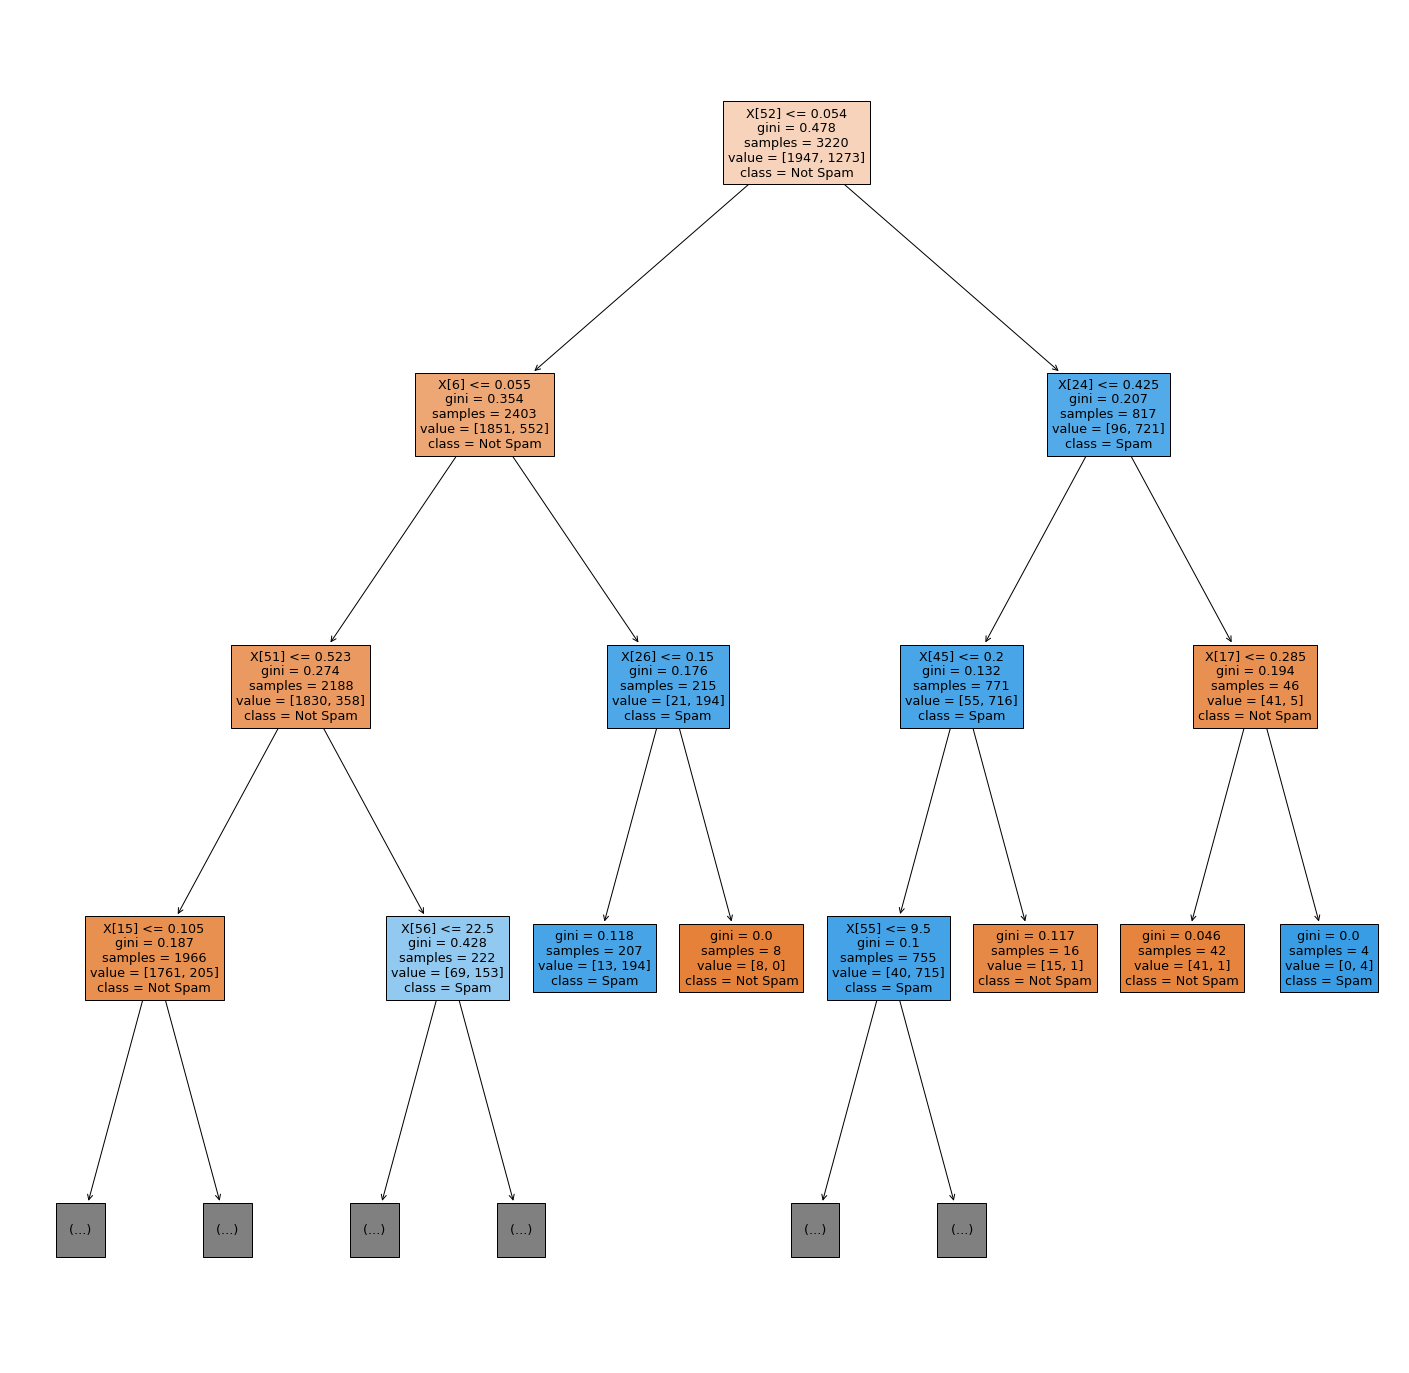

In [8]:
# Sets the figure size
fig = plt.figure(figsize=(25, 25))

# Creates a visual display of the model.
# Keep max_depth small for better visualization 
t = plot_tree(
    best_dt,
    class_names=spam,
    max_depth=3,
    filled=True)

# TEST MODEL
Display the confusion matrix for the test data `tst` using the optimum decision tree model, `best_dt`, found in the training phase. A good evaluation measure is the `confusion matrix` that gives the fraction of true positives, true negatives, false positives, and false negatives.

## Visualize the Confusion Matrix

Normalize the scores to display as proportions across rows.

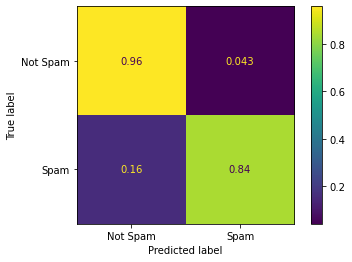

In [9]:
plot_confusion_matrix(
    best_dt, X_tst, y_tst,
    display_labels=spam,
    normalize='true')

## Calculate Mean Accuracy on Testing Data

In [10]:
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(best_dt.score(X_tst, y_tst))))

Accuracy on testing data: 91.24%


# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.